## Real Dataset Creation

## Single Company and Metric

In [4]:
import pandas as pd
from pathlib import Path

# Choose ticker and metric
ticker = "JNJ"
metric = "EPS"
filename = f"{metric} {ticker}.xlsx"

# Build path: real_data/<ticker>/<filename>
file_path = Path("real_data") / ticker / filename

# Load Excel file without headers
df = pd.read_excel(file_path, header=None)

# Show shape and first 30 rows to verify structure
print(df.shape)
df.head(30)

(85, 108)


,0,1,2,3,4,5,6,7,8,9,...,98,99,100,101,102,103,104,105,106,107
0,NaN,JNJ | Estimate Details | Single Measure/Multi-...,21-May-2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Next Earning Report,16-Jul-2025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Measure,Earnings Per Share,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Periodicity,Annual & Interim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,Basis Indicator,Primary Basis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,EARNINGS PER SHARE - Consolidated USD Per Share,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,HISTORICAL,NaN,FORECAST,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,FY 2005,NaN,NaN,NaN,NaN,FY 2006,...,NaN,NaN,NaN,FY 2025,FY 2026,FY 2027,NaN,NaN,NaN,NaN


In [5]:
# Extract raw period labels from row 10 (index 10), starting at column 4 (index E)
raw_periods = df.iloc[10, 4:].tolist()

# Clean: convert non-empty entries to strings, empty cells to None
periods_cleaned = [str(p).strip() if pd.notna(p) else None for p in raw_periods]

# Cut list at the first None (gap), to exclude future estimates
if None in periods_cleaned:
    first_none_idx = periods_cleaned.index(None)
    periods = periods_cleaned[:first_none_idx]
else:
    periods = periods_cleaned

# Preview results
print(f"Total usable historical periods: {len(periods)}")
print(periods[:10])

Total usable historical periods: 96
['Q1 Mar-05', 'Q2 Jun-05', 'Q3 Sep-05', 'Q4 Dec-05', 'FY Dec-05', 'Q1 Mar-06', 'Q2 Jun-06', 'Q3 Sep-06', 'Q4 Dec-06', 'FY Dec-06']


In [6]:
import numpy as np

# Get actual values from row 18 (0-based index)
actual_values = df.iloc[18, 4:4 + len(periods)].tolist()

# Replace "-" with np.nan for consistency
actual_values = [np.nan if v == "-" else v for v in actual_values]

# Map periods to actuals
actuals_dict = dict(zip(periods, actual_values))

# Preview
for k, v in list(actuals_dict.items())[:10]:
    print(f"{k}: {v}")

Q1 Mar-05: 0.97
Q2 Jun-05: 0.93
Q3 Sep-05: 0.87
Q4 Dec-05: 0.73
FY Dec-05: 3.5
Q1 Mar-06: 0.99
Q2 Jun-06: 0.98
Q3 Sep-06: 0.98
Q4 Dec-06: 0.81
FY Dec-06: 3.76


In [7]:
# Starting row for estimates
start_row = 24  # row 24 is header, row 25 (index 25) contains data

# Extract each piece
contributor_col = df.iloc[start_row:, 1].reset_index(drop=True)  # column B
analyst_col = df.iloc[start_row:, 2].reset_index(drop=True)      # column C
estimates_block = df.iloc[start_row:, 4:4 + len(periods)].reset_index(drop=True)  # columns E onward

# Combine into single DataFrame
analyst_df = pd.concat([contributor_col, analyst_col, estimates_block], axis=1)

# Rename columns
cols = ["Contributor", "Analyst"] + periods
analyst_df.columns = cols

# Preview
analyst_df.head()

,Contributor,Analyst,Q1 Mar-05,Q2 Jun-05,Q3 Sep-05,Q4 Dec-05,FY Dec-05,Q1 Mar-06,Q2 Jun-06,Q3 Sep-06,...,Q2 Jun-22,Q3 Sep-22,Q4 Dec-22,FY Dec-22,FY Dec-23,Q1 Mar-24,Q2 Jun-24,Q3 Sep-24,Q4 Dec-24,FY Dec-24
0,"STIFEL NICOLAUS AND COMPANY, INCORPORATED","Wise, Rick",-,-,-,-,-,-,-,-,...,2.5,2.4,2.22,10.03,9.91,2.58,2.69,2.16,1.98,9.93
1,ARGUS RESEARCH CORPORATION,"Toung, David H",-,-,-,-,3.49,-,-,-,...,-,-,-,10.1,10.1,-,-,-,-,9.96
2,EQUISIGHTS,"Talsania, Parth",-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,6.87
3,LEERINK PARTNERS,"Risinger, David R",0.91,0.9,0.85,0.73,3.5,0.99,0.98,0.93,...,2.696,2.5,2.22,10.04,10.1,2.59,2.73,2.35,1.96,9.91
4,CRISPIDEA PRIVATE LIMITED,"N., Sheshadri",-,-,-,-,-,-,-,-,...,-,-,-,10.07,9.93,-,-,-,-,9.96


In [8]:
import numpy as np

# Initialize anonymization counters
anon_company_counter = 1
anon_analyst_counter = 1

def anonymize(name, is_company=True):
    global anon_company_counter, anon_analyst_counter
    if pd.isna(name) or name == "-" or "undisclosed" in str(name).lower():
        if is_company:
            name = f"AnonymousCompany{anon_company_counter}"
            anon_company_counter += 1
        else:
            name = f"AnonymousAnalyst{anon_analyst_counter}"
            anon_analyst_counter += 1
    return str(name).strip()

# Apply anonymization
analyst_df["Contributor"] = analyst_df["Contributor"].apply(lambda x: anonymize(x, is_company=True))
analyst_df["Analyst"] = analyst_df["Analyst"].apply(lambda x: anonymize(x, is_company=False))

# Replace "-" with NaN in estimate values
analyst_df = analyst_df.replace("-", np.nan)
analyst_df

C:\Users\alexc\AppData\Local\Temp\ipykernel_33624\2356637431.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  analyst_df = analyst_df.replace("-", np.nan)


,Contributor,Analyst,Q1 Mar-05,Q2 Jun-05,Q3 Sep-05,Q4 Dec-05,FY Dec-05,Q1 Mar-06,Q2 Jun-06,Q3 Sep-06,...,Q2 Jun-22,Q3 Sep-22,Q4 Dec-22,FY Dec-22,FY Dec-23,Q1 Mar-24,Q2 Jun-24,Q3 Sep-24,Q4 Dec-24,FY Dec-24
0,"STIFEL NICOLAUS AND COMPANY, INCORPORATED","Wise, Rick",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.5,2.4,2.22,10.03,9.91,2.58,2.69,2.16,1.98,9.93
1,ARGUS RESEARCH CORPORATION,"Toung, David H",NaN,NaN,NaN,NaN,3.49,NaN,NaN,NaN,...,NaN,NaN,NaN,10.1,10.1,NaN,NaN,NaN,NaN,9.96
2,EQUISIGHTS,"Talsania, Parth",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.87
3,LEERINK PARTNERS,"Risinger, David R",0.91,0.9,0.85,0.73,3.5,0.99,0.98,0.93,...,2.696,2.5,2.22,10.04,10.1,2.59,2.73,2.35,1.96,9.91
4,CRISPIDEA PRIVATE LIMITED,"N., Sheshadri",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10.07,9.93,NaN,NaN,NaN,NaN,9.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,AXIA FINANCIAL RESEARCH,AnonymousAnalyst46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,SOCIETE GENERALE,AnonymousAnalyst47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10.05,10.05,NaN,NaN,NaN,NaN,NaN
58,DZ BANK,AnonymousAnalyst48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,BAPTISTA RESEARCH,AnonymousAnalyst49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,7.94,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Filter rows that contain at least one numeric value in period columns
def has_numeric_estimate(row):
    return any(pd.to_numeric(row[periods], errors='coerce').notna())

analyst_df = analyst_df[analyst_df.apply(has_numeric_estimate, axis=1)].copy()

# Preview cleaned estimates
analyst_df.head()

,Contributor,Analyst,Q1 Mar-05,Q2 Jun-05,Q3 Sep-05,Q4 Dec-05,FY Dec-05,Q1 Mar-06,Q2 Jun-06,Q3 Sep-06,...,Q2 Jun-22,Q3 Sep-22,Q4 Dec-22,FY Dec-22,FY Dec-23,Q1 Mar-24,Q2 Jun-24,Q3 Sep-24,Q4 Dec-24,FY Dec-24
0,"STIFEL NICOLAUS AND COMPANY, INCORPORATED","Wise, Rick",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.5,2.4,2.22,10.03,9.91,2.58,2.69,2.16,1.98,9.93
1,ARGUS RESEARCH CORPORATION,"Toung, David H",NaN,NaN,NaN,NaN,3.49,NaN,NaN,NaN,...,NaN,NaN,NaN,10.1,10.1,NaN,NaN,NaN,NaN,9.96
2,EQUISIGHTS,"Talsania, Parth",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.87
3,LEERINK PARTNERS,"Risinger, David R",0.91,0.9,0.85,0.73,3.5,0.99,0.98,0.93,...,2.696,2.5,2.22,10.04,10.1,2.59,2.73,2.35,1.96,9.91
4,CRISPIDEA PRIVATE LIMITED,"N., Sheshadri",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10.07,9.93,NaN,NaN,NaN,NaN,9.96


In [10]:
# Melt the wide analyst dataframe to long format
df_long = analyst_df.melt(
    id_vars=["Contributor", "Analyst"],
    var_name="Period",
    value_name="Predicted_Value"
)

# Add constant metadata columns
df_long["Ticker"] = ticker
df_long["Estimate_Type"] = metric
df_long["Horizon"] = df_long["Period"].apply(lambda x: "FY" if "FY" in str(x) else "Quarter")
df_long["Actual_Value"] = df_long["Period"].map(actuals_dict)

# Reorder columns to match synthetic dataset structure
df_long = df_long[[
    "Ticker", "Period", "Horizon", "Estimate_Type",
    "Contributor", "Analyst", "Predicted_Value", "Actual_Value"
]]

# Preview result
df_long.head()

,Ticker,Period,Horizon,Estimate_Type,Contributor,Analyst,Predicted_Value,Actual_Value
0,JNJ,Q1 Mar-05,Quarter,EPS,"STIFEL NICOLAUS AND COMPANY, INCORPORATED","Wise, Rick",NaN,0.97
1,JNJ,Q1 Mar-05,Quarter,EPS,ARGUS RESEARCH CORPORATION,"Toung, David H",NaN,0.97
2,JNJ,Q1 Mar-05,Quarter,EPS,EQUISIGHTS,"Talsania, Parth",NaN,0.97
3,JNJ,Q1 Mar-05,Quarter,EPS,LEERINK PARTNERS,"Risinger, David R",0.91,0.97
4,JNJ,Q1 Mar-05,Quarter,EPS,CRISPIDEA PRIVATE LIMITED,"N., Sheshadri",NaN,0.97


## Whole Dataset

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

# Define the root folder
root = Path("real_data")

# Get all tickers (subfolders)
tickers = [folder for folder in root.iterdir() if folder.is_dir()]

# Create an empty list to collect all cleaned estimates
all_estimates = []

print(f"Found {len(tickers)} companies:", [t.name for t in tickers])

Found 226 companies: ['003550.KS', '005380.KS', '005930.KS', '0700.HK', '0941.HK', '4502.T', '7203.T', '7267.T', '9434.T', 'AAPL.O', 'ABBV.K', 'ACLS.O', 'ACRS.O', 'ADBE.O', 'ADSGn.DE', 'AEP.O', 'AIG', 'ALLE.K', 'ALVG.DE', 'AMD.O', 'AMGN.O', 'AMP', 'AMZN.O', 'AOS', 'APA.O', 'APP.O', 'AXAF.PA', 'AXON.O', 'AXP', 'AZN.L', 'BABA.K', 'BAC', 'BAES.L', 'BARC.L', 'BASFn.DE', 'BATS.L', 'BAYGn.DE', 'BBY', 'BIIB.O', 'BK', 'BKR.O', 'BLDR.K', 'BLK', 'BMY', 'BNPP.PA', 'BP.L', 'C', 'CAT.N', 'CDLX.O', 'CEG.O', 'CHTR.O', 'CHWY.K', 'CI', 'CL', 'CLX', 'CMCSA.O', 'CMG', 'COP', 'COST.O', 'CRM', 'CROX.O', 'CRWD.O', 'CSCO.O', 'CSX.O', 'CVX', 'D', 'DB', 'DDOG.O', 'DE.N', 'DG', 'DGE.L', 'DHI', 'DIS.N', 'DPZ.O', 'DTE', 'DTEGn.DE', 'DUK', 'ED', 'ENEI.MI', 'ENPH.O', 'EOG', 'ES', 'ETN', 'EXAS.O', 'EXC.O', 'F', 'FDX', 'FIVN.O', 'FND', 'FSLR.O', 'GD', 'GE', 'GILD.O', 'GM', 'GOOGL.O', 'GS', 'GSK.L', 'HAL', 'HAS.O', 'HD', 'HIMS.K', 'HON.O', 'HRMY.O', 'HSBA.L', 'HUBS.K', 'IBM', 'ICE', 'INO.O', 'INTC.O', 'ITW', 'JACK.O',

In [2]:
# Store each file to process: (ticker, metric, path)
files_to_process = []

for ticker_folder in tickers:
    ticker = ticker_folder.name
    for file in ticker_folder.glob("*.xlsx"):
        metric = file.stem.replace(f" {ticker}", "")  # e.g., "EBIT AAPL.O" → "EBIT"
        files_to_process.append((ticker, metric, file))

print(f"Total files to process: {len(files_to_process)}")
print("Examples:", files_to_process[:5])

Total files to process: 1114
Examples: [('003550.KS', 'EBIT', WindowsPath('real_data/003550.KS/EBIT 003550.KS.xlsx')), ('003550.KS', 'EBITDA', WindowsPath('real_data/003550.KS/EBITDA 003550.KS.xlsx')), ('003550.KS', 'EPS', WindowsPath('real_data/003550.KS/EPS 003550.KS.xlsx')), ('003550.KS', 'Net Income', WindowsPath('real_data/003550.KS/Net Income 003550.KS.xlsx')), ('003550.KS', 'Revenue', WindowsPath('real_data/003550.KS/Revenue 003550.KS.xlsx'))]


In [3]:
import pandas as pd
import numpy as np
import re

import re

def extract_currency(text):
    # Extract uppercase currency code followed by unit (Millions, Billions, Per Share)
    match = re.search(r'\b([A-Z]{3})\b\s+(Millions|Billions|Per\s+Share)', text, re.IGNORECASE)
    if match:
        code = match.group(1).upper()
        # Normalize GBp to GBP
        if code == "GBP" or code == "GBp":
            return "GBP"
        return code
    return "Unknown"

def process_file(ticker, metric, file_path):
    try:
        df = pd.read_excel(file_path, header=None)

        # --- 1. Extract period labels from row 10 ---
        raw_periods = df.iloc[10, 4:].tolist()
        periods_cleaned = [str(p).strip() if pd.notna(p) else None for p in raw_periods]
        periods = periods_cleaned[:periods_cleaned.index(None)] if None in periods_cleaned else periods_cleaned
        if not periods:
            return pd.DataFrame()

        # --- 2. Extract currency from cell A8 ---
        currency_cell = str(df.iloc[7, 0])  # A8 = row 7, col 0
        currency = extract_currency(currency_cell)

        # --- 3. Identify "Actual" row (search rows 16–19) ---
        actual_row = None
        for i in range(16, 20):
            row_values = df.iloc[i].astype(str).str.lower().str.strip()
            if "actual" in row_values.values:
                actual_row = i
                break
        if actual_row is None:
            raise ValueError("No 'Actual' row found in expected rows")

        # --- 4. Extract actual values ---
        actual_values = df.iloc[actual_row, 4:4 + len(periods)].tolist()
        actual_values = [np.nan if v == "-" else v for v in actual_values]
        actuals_dict = dict(zip(periods, actual_values))

        # --- 5. Locate analyst header ("Contributor") dynamically ---
        for i in range(actual_row + 1, actual_row + 6):
            cell = str(df.iloc[i, 1]).strip().lower()
            if cell == "contributor":
                start_row = i + 1
                break
        else:
            raise ValueError("Could not locate start of analyst data after 'Actual' row")

        # --- 6. Extract analyst data ---
        contributor_col = df.iloc[start_row:, 1].reset_index(drop=True)
        analyst_col = df.iloc[start_row:, 2].reset_index(drop=True)
        estimates_block = df.iloc[start_row:, 4:4 + len(periods)].reset_index(drop=True)
        analyst_df = pd.concat([contributor_col, analyst_col, estimates_block], axis=1)
        analyst_df.columns = ["Contributor", "Analyst"] + periods

        # --- 7. Anonymization ---
        anon_company_counter = 1
        anon_analyst_counter = 1

        def anonymize(name, is_company=True):
            nonlocal anon_company_counter, anon_analyst_counter
            if pd.isna(name) or name == "-" or "undisclosed" in str(name).lower():
                if is_company:
                    name = f"AnonymousCompany{anon_company_counter}"
                    anon_company_counter += 1
                else:
                    name = f"AnonymousAnalyst{anon_analyst_counter}"
                    anon_analyst_counter += 1
            return str(name).strip()

        analyst_df["Contributor"] = analyst_df["Contributor"].apply(lambda x: anonymize(x, is_company=True))
        analyst_df["Analyst"] = analyst_df["Analyst"].apply(lambda x: anonymize(x, is_company=False))
        analyst_df = analyst_df.replace("-", np.nan).infer_objects(copy=False)

        # --- 8. Filter only rows with numeric estimates ---
        def has_numeric_estimate(row):
            return any(pd.to_numeric(row[periods], errors='coerce').notna())

        analyst_df = analyst_df[analyst_df.apply(has_numeric_estimate, axis=1)].copy()
        if analyst_df.empty:
            return pd.DataFrame()

        # --- 9. Melt to long format ---
        df_long = analyst_df.melt(
            id_vars=["Contributor", "Analyst"],
            var_name="Period",
            value_name="Predicted_Value"
        )

        # --- 10. Add static metadata ---
        df_long["Ticker"] = ticker
        df_long["Estimate_Type"] = metric.split()[0] if " " in metric else metric
        df_long["Horizon"] = df_long["Period"].apply(
            lambda x: "FY" if "FY" in str(x)
            else "H1" if "SAN1" in str(x).upper()
            else "H2" if "SAN2" in str(x).upper()
            else "Quarter"
        )
        df_long["Actual_Value"] = df_long["Period"].map(actuals_dict)
        df_long["Currency"] = currency

        df_long = df_long[[ 
            "Ticker", "Period", "Horizon", "Estimate_Type",
            "Contributor", "Analyst", "Predicted_Value", "Actual_Value", "Currency"
        ]]

        return df_long

    except Exception as e:
        print(f"❌ Error processing {file_path}: {e}")
        return pd.DataFrame()

In [4]:
import warnings
warnings.filterwarnings("ignore")

# Loop through each (ticker, metric, path) and process the file
for ticker, metric, file_path in files_to_process:
    df_result = process_file(ticker, metric, file_path)
    if not df_result.empty:
        all_estimates.append(df_result)

# Combine all non-empty results into a single DataFrame
final_df = pd.concat(all_estimates, ignore_index=True)

# Show result
print(f"Final dataset shape: {final_df.shape}")
final_df.head()

Final dataset shape: (4757916, 9)


,Ticker,Period,Horizon,Estimate_Type,Contributor,Analyst,Predicted_Value,Actual_Value,Currency
0,003550.KS,FY Dec-05,FY,EBIT,DAISHIN SECURITIES,"Yang, Joshua",NaN,3267.021,KRW
1,003550.KS,FY Dec-05,FY,EBIT,KB SECURITIES,"Park, Kunyung",NaN,3267.021,KRW
2,003550.KS,FY Dec-05,FY,EBIT,HEUNGKUK SECURITIES,"Park, Jong Ryeol",NaN,3267.021,KRW
3,003550.KS,FY Dec-05,FY,EBIT,YUANTA SECURITIES (KOREA),"Lee, Seung-woong",NaN,3267.021,KRW
4,003550.KS,FY Dec-05,FY,EBIT,HI INVESTMENT & SECURITIES,"Lee, Sang Hun",NaN,3267.021,KRW


In [5]:
final_df["Estimate_Type"] = final_df["Estimate_Type"].replace("Net", "Net Income")

In [6]:
final_df["Estimate_Type"].unique()

array(['EBIT', 'EBITDA', 'EPS', 'Net Income', 'Revenue'], dtype=object)

In [7]:
final_df["Estimate_Type"].value_counts(normalize=True)

Estimate_Type
EPS           0.240273
Revenue       0.221276
Net Income    0.209616
EBIT          0.172540
EBITDA        0.156294
Name: proportion, dtype: float64

In [8]:
final_df["Ticker"].unique()

array(['003550.KS', '005380.KS', '005930.KS', '0700.HK', '0941.HK',
       '4502.T', '7203.T', '7267.T', '9434.T', 'AAPL.O', 'ABBV.K',
       'ACLS.O', 'ACRS.O', 'ADBE.O', 'ADSGn.DE', 'AEP.O', 'AIG', 'ALLE.K',
       'ALVG.DE', 'AMD.O', 'AMGN.O', 'AMP', 'AMZN.O', 'AOS', 'APA.O',
       'APP.O', 'AXAF.PA', 'AXON.O', 'AXP', 'AZN.L', 'BABA.K', 'BAC',
       'BAES.L', 'BARC.L', 'BASFn.DE', 'BATS.L', 'BAYGn.DE', 'BBY',
       'BIIB.O', 'BK', 'BKR.O', 'BLDR.K', 'BLK', 'BMY', 'BNPP.PA', 'BP.L',
       'C', 'CAT.N', 'CDLX.O', 'CEG.O', 'CHTR.O', 'CHWY.K', 'CI', 'CL',
       'CLX', 'CMCSA.O', 'CMG', 'COP', 'COST.O', 'CRM', 'CROX.O',
       'CRWD.O', 'CSCO.O', 'CSX.O', 'CVX', 'D', 'DB', 'DDOG.O', 'DE.N',
       'DG', 'DGE.L', 'DHI', 'DIS.N', 'DPZ.O', 'DTE', 'DTEGn.DE', 'DUK',
       'ED', 'ENEI.MI', 'ENPH.O', 'EOG', 'ES', 'ETN', 'EXAS.O', 'EXC.O',
       'F', 'FDX', 'FIVN.O', 'FND', 'FSLR.O', 'GD', 'GE', 'GILD.O', 'GM',
       'GOOGL.O', 'GS', 'GSK.L', 'HAL', 'HAS.O', 'HD', 'HIMS.K', 'HON.O',
   

In [9]:
final_df["Currency"].value_counts(normalize=True)

Currency
USD    0.848523
EUR    0.078498
CNY    0.024715
GBP    0.021898
KRW    0.012433
JPY    0.010425
CHF    0.003509
Name: proportion, dtype: float64

In [10]:
na_percentage = final_df.isna().mean() * 100
print(na_percentage.sort_values(ascending=False))  # order desc

Predicted_Value    75.609006
Actual_Value        1.188777
Ticker              0.000000
Period              0.000000
Horizon             0.000000
Estimate_Type       0.000000
Contributor         0.000000
Analyst             0.000000
Currency            0.000000
dtype: float64


In [11]:
final_df = final_df.dropna() # clean dataset
print(final_df.shape)
final_df.head()

(1156022, 9)


,Ticker,Period,Horizon,Estimate_Type,Contributor,Analyst,Predicted_Value,Actual_Value,Currency
43,003550.KS,FY Dec-06,FY,EBIT,AnonymousCompany3,AnonymousAnalyst3,235.094,1558.040,KRW
73,003550.KS,FY Dec-07,FY,EBIT,AnonymousCompany3,AnonymousAnalyst3,786.581,5070.769,KRW
127,003550.KS,Q3 Sep-11,Quarter,EBIT,NH INVESTMENT & SECURITIES (PREVIOUSLY WOORI R...,"Kim, Dongyang",246.163,230.939,KRW
157,003550.KS,Q4 Dec-11,Quarter,EBIT,NH INVESTMENT & SECURITIES (PREVIOUSLY WOORI R...,"Kim, Dongyang",543.192,329.465,KRW
181,003550.KS,FY Dec-11,FY,EBIT,KB SECURITIES,"Park, Kunyung",1324.74,1306.519,KRW


In [12]:
# Optional: We get rid of Anonymous Analysts (those that appear as "Undisclosed")

final_df = final_df[~final_df["Analyst"].str.contains("Anonymous", na=False)]
print(final_df.shape)
final_df.head()

(288292, 9)


,Ticker,Period,Horizon,Estimate_Type,Contributor,Analyst,Predicted_Value,Actual_Value,Currency
127,003550.KS,Q3 Sep-11,Quarter,EBIT,NH INVESTMENT & SECURITIES (PREVIOUSLY WOORI R...,"Kim, Dongyang",246.163,230.939,KRW
157,003550.KS,Q4 Dec-11,Quarter,EBIT,NH INVESTMENT & SECURITIES (PREVIOUSLY WOORI R...,"Kim, Dongyang",543.192,329.465,KRW
181,003550.KS,FY Dec-11,FY,EBIT,KB SECURITIES,"Park, Kunyung",1324.74,1306.519,KRW
187,003550.KS,FY Dec-11,FY,EBIT,NH INVESTMENT & SECURITIES (PREVIOUSLY WOORI R...,"Kim, Dongyang",1533.167,1306.519,KRW
188,003550.KS,FY Dec-11,FY,EBIT,MACQUARIE RESEARCH,"Kim, Daniel",2682.474,1306.519,KRW


In [13]:
final_df["Analyst"].nunique()

925

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def parse_period(period_str, horizon):
    """Convert period string to datetime"""
    try:
        if horizon == "FY":
            return pd.to_datetime(period_str.replace("FY ", ""), format="%b-%y")
        elif horizon == "Quarter":
            q, month_year = period_str.split()
            base_date = pd.to_datetime(month_year, format="%b-%y")
            quarter_offset = {"Q1": 0, "Q2": 3, "Q3": 6, "Q4": 9}.get(q, 0)
            return base_date + pd.DateOffset(months=quarter_offset)
    except:
        return pd.NaT

def plot_analyst_predictions(df, ticker, metric, horizon="Quarter", n_analysts=None):
    """
    Plots analyst predictions for a given ticker, metric, and horizon.
    Non-anonymous analysts only. Gaps in time series are shown as breaks.
    """
    filtered = df[
        (df["Ticker"] == ticker) &
        (df["Estimate_Type"] == metric) &
        (df["Horizon"] == horizon) &
        (~df["Analyst"].str.startswith("Anonymous"))
    ].copy()

    # Parse period
    filtered["Parsed_Period"] = filtered["Period"].apply(lambda x: parse_period(x, horizon))
    filtered = filtered.dropna(subset=["Parsed_Period", "Predicted_Value"])

    # Select top analysts
    analyst_counts = filtered["Analyst"].value_counts()
    selected_analysts = analyst_counts.head(n_analysts).index if n_analysts else analyst_counts.index
    filtered = filtered[filtered["Analyst"].isin(selected_analysts)]

    # Create a common time index
    all_periods = pd.Series(filtered["Parsed_Period"].unique()).sort_values()

    # Pivot to make discontinuities visible
    pivot_df = filtered.pivot_table(index="Parsed_Period", columns="Analyst", values="Predicted_Value")
    pivot_df = pivot_df.reindex(all_periods)

    # Actual values
    actuals = (
        filtered[["Parsed_Period", "Actual_Value"]]
        .dropna()
        .drop_duplicates("Parsed_Period")
        .set_index("Parsed_Period")
        .sort_index()
    )

    # Plotting
    fig, ax = plt.subplots(figsize=(12, 6))

    for col in pivot_df.columns:
        ax.plot(pivot_df.index, pivot_df[col], label=col, linewidth=1.5, alpha=0.8)

    if not actuals.empty:
        ax.plot(actuals.index, actuals["Actual_Value"], color='black', linestyle='--', marker='o',
                linewidth=2.5, label="Actual Value")

    ax.set_title(f"{ticker} – {metric} Forecasts by Analyst ({horizon})", fontsize=15)
    ax.set_xlabel("Forecast Period", fontsize=12)
    ax.set_ylabel(metric, fontsize=12)
    ax.grid(True, linestyle="--", alpha=0.5)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    plt.xticks(rotation=45)
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title="Analyst")
    plt.tight_layout()
    plt.show()

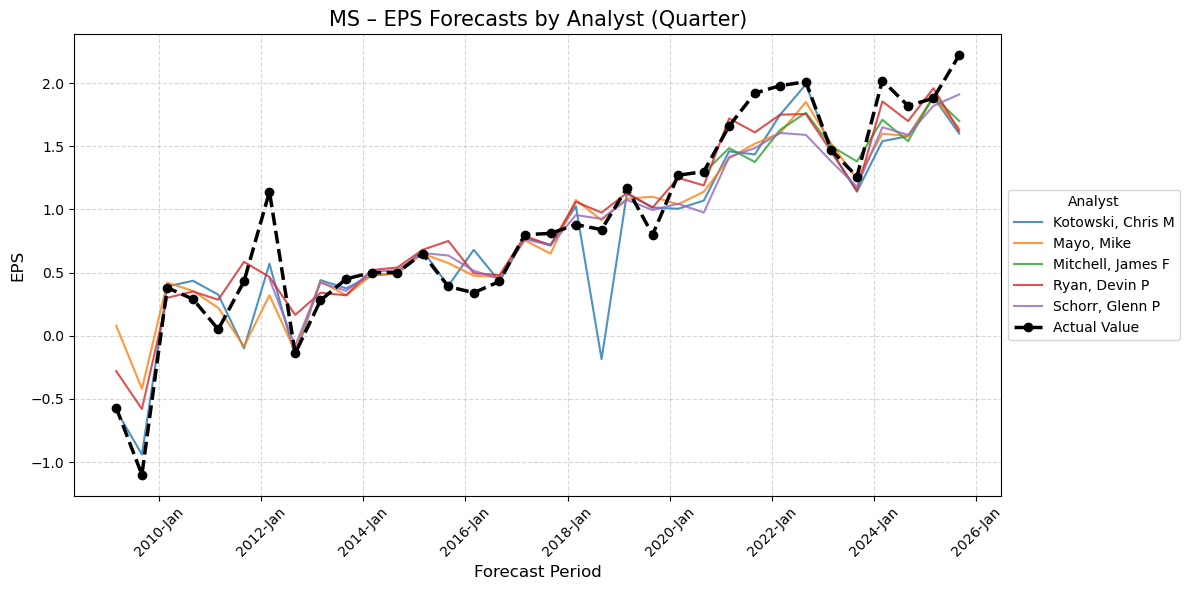

In [15]:
plot_analyst_predictions(final_df, ticker="MS", metric="EPS", horizon="Quarter")

Number of predictions per analyst:

Analyst
Read, Roger D         3395
MacGregor, David S    2658
Martin, Laura A       2596
Griffin, Bobby        2492
Bittner, Brian        2356
                      ... 
Kim, Choong-Hyun         3
Lee, Minjae              2
Seo, Mihwa               2
Ding, Ethan              1
Kim, Jingu               1
Name: count, Length: 925, dtype: int64


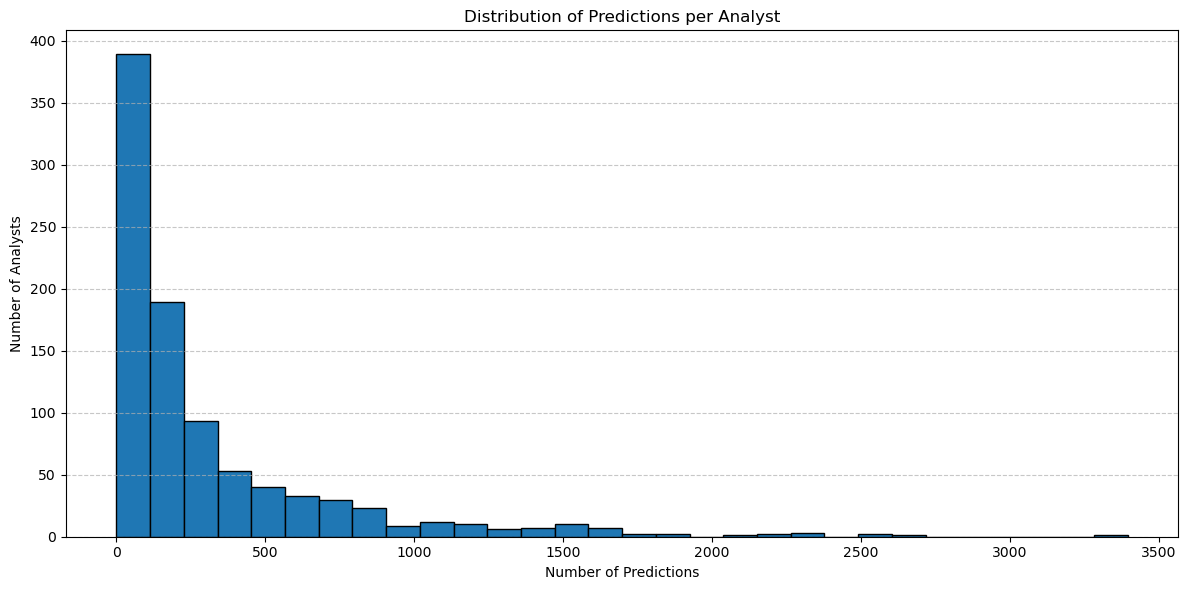

In [16]:
import matplotlib.pyplot as plt

def plot_analyst_prediction_counts(df):
    """
    Plots and prints a histogram of the number of predictions made by each analyst.
    """
    analyst_counts = df['Analyst'].value_counts()

    # Print counts
    print("Number of predictions per analyst:\n")
    print(analyst_counts)

    # Plot histogram
    plt.figure(figsize=(12, 6))
    plt.hist(analyst_counts, bins=30, edgecolor='black')
    plt.title("Distribution of Predictions per Analyst")
    plt.xlabel("Number of Predictions")
    plt.ylabel("Number of Analysts")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_analyst_prediction_counts(final_df)

In [17]:
analyst_counts = final_df['Analyst'].value_counts()
analyst_counts

Analyst
Read, Roger D         3395
MacGregor, David S    2658
Martin, Laura A       2596
Griffin, Bobby        2492
Bittner, Brian        2356
                      ... 
Kim, Choong-Hyun         3
Lee, Minjae              2
Seo, Mihwa               2
Ding, Ethan              1
Kim, Jingu               1
Name: count, Length: 925, dtype: int64

In [18]:
median = analyst_counts.median()
percentile_10 = analyst_counts.quantile(0.10)
percentile_25 = analyst_counts.quantile(0.25)
percentile_75 = analyst_counts.quantile(0.75)
percentile_90 = analyst_counts.quantile(0.90)

print(f"Median: {median}")
print(f"10th percentile: {percentile_10}")
print(f"25th percentile: {percentile_25}")
print(f"75th percentile: {percentile_75}")
print(f"90th percentile: {percentile_90}")

Median: 150.0
10th percentile: 15.0
25th percentile: 53.0
75th percentile: 378.0
90th percentile: 821.6


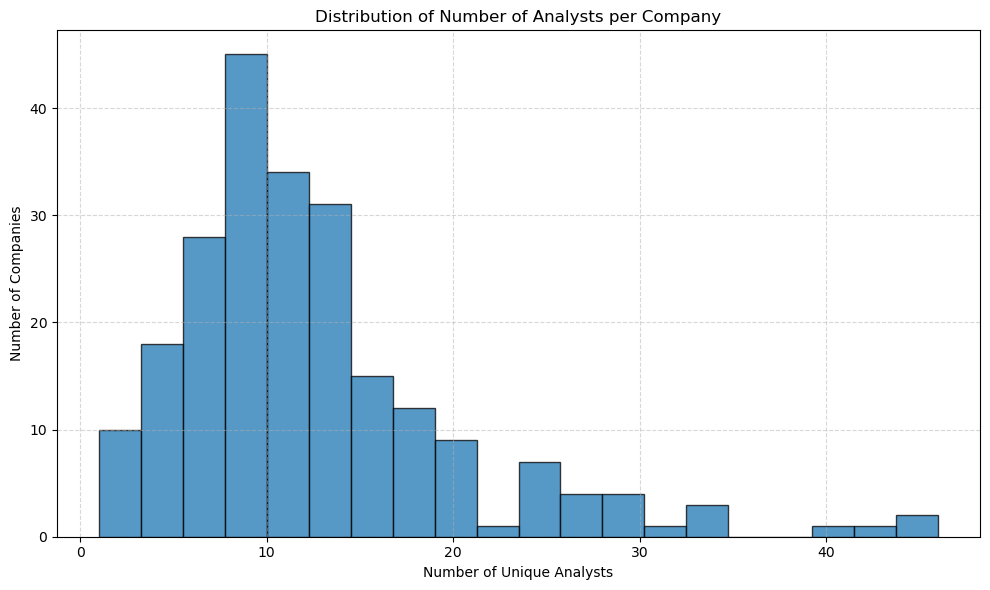

In [19]:
import matplotlib.pyplot as plt

# Count unique analysts per company
analyst_counts = final_df.groupby("Ticker")["Analyst"].nunique()

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(analyst_counts, bins=20, edgecolor='black', alpha=0.75)
plt.title("Distribution of Number of Analysts per Company")
plt.xlabel("Number of Unique Analysts")
plt.ylabel("Number of Companies")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Adding more info from YFinance

In [20]:
final_df

,Ticker,Period,Horizon,Estimate_Type,Contributor,Analyst,Predicted_Value,Actual_Value,Currency
127,003550.KS,Q3 Sep-11,Quarter,EBIT,NH INVESTMENT & SECURITIES (PREVIOUSLY WOORI R...,"Kim, Dongyang",246.163,230.939,KRW
157,003550.KS,Q4 Dec-11,Quarter,EBIT,NH INVESTMENT & SECURITIES (PREVIOUSLY WOORI R...,"Kim, Dongyang",543.192,329.465,KRW
181,003550.KS,FY Dec-11,FY,EBIT,KB SECURITIES,"Park, Kunyung",1324.74,1306.519,KRW
187,003550.KS,FY Dec-11,FY,EBIT,NH INVESTMENT & SECURITIES (PREVIOUSLY WOORI R...,"Kim, Dongyang",1533.167,1306.519,KRW
188,003550.KS,FY Dec-11,FY,EBIT,MACQUARIE RESEARCH,"Kim, Daniel",2682.474,1306.519,KRW
...,...,...,...,...,...,...,...,...,...
4757881,ZS.O,Q3 Apr-25,Quarter,Revenue,TRUIST SECURITIES,"Fishbein, Joel P",666.6,678.034,USD
4757882,ZS.O,Q3 Apr-25,Quarter,Revenue,GUGGENHEIM SECURITIES LLC,"DiFucci, John S",666,678.034,USD
4757883,ZS.O,Q3 Apr-25,Quarter,Revenue,NEEDHAM & COMPANY INC.,"Cikos, Michael",666.607,678.034,USD
4757884,ZS.O,Q3 Apr-25,Quarter,Revenue,"STIFEL NICOLAUS AND COMPANY, INCORPORATED","Borg, Adam C",666.7,678.034,USD


In [21]:
import yfinance as yf

ticker = "AAPL" # sample ticker
stock = yf.Ticker(ticker) # download ticker object
info = stock.info # static info dictionary
info

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '(408) 996-1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryKey': 'consumer-electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and p

In [22]:
final_df["Ticker"].unique()

array(['003550.KS', '005380.KS', '005930.KS', '0700.HK', '0941.HK',
       '4502.T', '7203.T', '7267.T', '9434.T', 'AAPL.O', 'ABBV.K',
       'ACLS.O', 'ACRS.O', 'ADBE.O', 'ADSGn.DE', 'AEP.O', 'AIG', 'ALLE.K',
       'ALVG.DE', 'AMD.O', 'AMGN.O', 'AMP', 'AMZN.O', 'AOS', 'APA.O',
       'APP.O', 'AXAF.PA', 'AXON.O', 'AXP', 'AZN.L', 'BABA.K', 'BAC',
       'BAES.L', 'BARC.L', 'BASFn.DE', 'BATS.L', 'BAYGn.DE', 'BBY',
       'BIIB.O', 'BK', 'BKR.O', 'BLDR.K', 'BLK', 'BMY', 'BNPP.PA', 'BP.L',
       'C', 'CAT.N', 'CDLX.O', 'CEG.O', 'CHTR.O', 'CHWY.K', 'CI', 'CL',
       'CLX', 'CMCSA.O', 'CMG', 'COP', 'COST.O', 'CRM', 'CROX.O',
       'CRWD.O', 'CSCO.O', 'CSX.O', 'CVX', 'D', 'DB', 'DDOG.O', 'DE.N',
       'DG', 'DGE.L', 'DHI', 'DIS.N', 'DPZ.O', 'DTE', 'DTEGn.DE', 'DUK',
       'ED', 'ENEI.MI', 'ENPH.O', 'EOG', 'ES', 'ETN', 'EXAS.O', 'EXC.O',
       'F', 'FDX', 'FIVN.O', 'FND', 'FSLR.O', 'GD', 'GE', 'GILD.O', 'GM',
       'GOOGL.O', 'GS', 'GSK.L', 'HAL', 'HAS.O', 'HD', 'HIMS.K', 'HON.O',
   

In [23]:
import pandas as pd
import time

tickers = final_df["Ticker"].unique() # unique tickers from final_df
info_columns = ["country", "industry", "sector", "shortName"] # columns to extract from yfinance info

results = [] # list to collect results

# Helper function to fix tickers for yfinance
def normalize_ticker(ticker):
    # yfinance accepts most tickers as-is, so we try raw first
    return ticker.replace(".O", "").replace(".K", "").replace(".PA", ".PA").replace(".DE", ".DE").replace(".L", ".L")

# Loop through tickers
for t in tickers:
    yf_ticker = normalize_ticker(t)
    try:
        stock = yf.Ticker(yf_ticker)
        info = stock.info

        row = {"Ticker": t}
        for col in info_columns:
            row[col] = info.get(col, None)
        results.append(row)

    except Exception as e:
        print(f"❌ {t} failed: {e}")
        continue

    time.sleep(0.5)  # avoid throttling

company_info_df = pd.DataFrame(results) # create DataFrame

print(company_info_df.shape)
company_info_df.head()

❌ 003550.KS failed: HTTP Error 404: 
❌ 005380.KS failed: HTTP Error 404: 
❌ 005930.KS failed: HTTP Error 404: 
❌ ADSGn.DE failed: HTTP Error 404: 
❌ BASFn.DE failed: HTTP Error 404: 
❌ BAYGn.DE failed: HTTP Error 404: 
❌ CAT.N failed: HTTP Error 404: 
❌ DE.N failed: HTTP Error 404: 
❌ DIS.N failed: HTTP Error 404: 
❌ MBGn.DE failed: HTTP Error 404: 
❌ MMM.N failed: HTTP Error 404: 
❌ NOVN.S failed: HTTP Error 404: 
❌ ROG.S failed: HTTP Error 404: 
❌ TTEF.PA failed: HTTP Error 404: 
❌ UNP.N failed: HTTP Error 404: 
(211, 5)


,Ticker,country,industry,sector,shortName
0,0700.HK,China,Internet Content & Information,Communication Services,TENCENT
1,0941.HK,Hong Kong,Telecom Services,Communication Services,CHINA MOBILE
2,4502.T,Japan,Drug Manufacturers - Specialty & Generic,Healthcare,TAKEDA PHARMACEUTICAL CO LTD
3,7203.T,Japan,Auto Manufacturers,Consumer Cyclical,TOYOTA MOTOR CORP
4,7267.T,Japan,Auto Manufacturers,Consumer Cyclical,HONDA MOTOR CO


In [24]:
# We define ticker overrides for known broken Refinitiv → yfinance tickers
ticker_mapping = {
    "ADSGn.DE": "ADS.DE",        # Adidas
    "BASFn.DE": "BASF.DE",       # BASF
    "BAYGn.DE": "BAYN.DE",       # Bayer
    "CAT.N": "CAT",              # Caterpillar
    "DE.N": "DE",                # Deere
    "DIS.N": "DIS",              # Disney
    "MBGn.DE": "MBG.DE",         # Mercedes-Benz
    "MMM.N": "MMM",              # 3M
    "NOVN.S": "NOVN.SW",         # Novartis
    "ROG.S": "ROG.SW",           # Roche
    "TTEF.PA": "TTE.PA",         # TotalEnergies
    "UNP.N": "UNP",              # Union Pacific
}

# We retry the failed ones with proper mappings
for refinitiv_ticker, yf_ticker in ticker_mapping.items():
    try:
        stock = yf.Ticker(yf_ticker)
        info = stock.info

        shortname = str(info.get("shortName", ""))
        if "0P0000" in shortname or shortname == yf_ticker:
            print(f"⚠️ {refinitiv_ticker} → {yf_ticker} returned invalid shortName, skipping...")
            continue

        row = {
            "Ticker": refinitiv_ticker,
            "country": info.get("country"),
            "industry": info.get("industry"),
            "sector": info.get("sector"),
            "shortName": shortname
        }

        # remove existing if already in results
        results = [r for r in results if r["Ticker"] != refinitiv_ticker]
        results.append(row)

    except Exception as e:
        print(f"❌ {refinitiv_ticker} → {yf_ticker} failed: {e}")
        continue

    time.sleep(0.5)

In [25]:
# Manual entries for tickers that fail or return garbage
manual_overrides = [
    {
        "Ticker": "003550.KS",
        "country": "South Korea",
        "industry": "Conglomerates",
        "sector": "Industrials",
        "shortName": "LG Corp"
    },
    {
        "Ticker": "005380.KS",
        "country": "South Korea",
        "industry": "Auto Manufacturers",
        "sector": "Consumer Cyclical",
        "shortName": "Hyundai Motor"
    },
    {
        "Ticker": "005930.KS",
        "country": "South Korea",
        "industry": "Semiconductors",
        "sector": "Technology",
        "shortName": "Samsung Electronics"
    }
]

# Remove if already in results, then append
manual_tickers = [d["Ticker"] for d in manual_overrides]
results = [r for r in results if r["Ticker"] not in manual_tickers]
results.extend(manual_overrides)

In [26]:
company_info_df = pd.DataFrame(results)
print(company_info_df.shape)
company_info_df.head()

(226, 5)


,Ticker,country,industry,sector,shortName
0,0700.HK,China,Internet Content & Information,Communication Services,TENCENT
1,0941.HK,Hong Kong,Telecom Services,Communication Services,CHINA MOBILE
2,4502.T,Japan,Drug Manufacturers - Specialty & Generic,Healthcare,TAKEDA PHARMACEUTICAL CO LTD
3,7203.T,Japan,Auto Manufacturers,Consumer Cyclical,TOYOTA MOTOR CORP
4,7267.T,Japan,Auto Manufacturers,Consumer Cyclical,HONDA MOTOR CO


In [27]:
company_info_df = company_info_df.rename(columns={
    "country": "Country",
    "industry": "Industry",
    "sector": "Sector",
    "shortName": "Company_Name"
})
company_info_df.head()

,Ticker,Country,Industry,Sector,Company_Name
0,0700.HK,China,Internet Content & Information,Communication Services,TENCENT
1,0941.HK,Hong Kong,Telecom Services,Communication Services,CHINA MOBILE
2,4502.T,Japan,Drug Manufacturers - Specialty & Generic,Healthcare,TAKEDA PHARMACEUTICAL CO LTD
3,7203.T,Japan,Auto Manufacturers,Consumer Cyclical,TOYOTA MOTOR CORP
4,7267.T,Japan,Auto Manufacturers,Consumer Cyclical,HONDA MOTOR CO


In [28]:
# We check for any missing values across relevant columns
missing_info_tickers = company_info_df[
    company_info_df[["Country", "Industry", "Sector", "Company_Name"]].isna().any(axis=1)
]["Ticker"].unique()

print(f"Tickers with missing static info: {len(missing_info_tickers)}")
print(missing_info_tickers)

Tickers with missing static info: 10
['ALVG.DE' 'AXAF.PA' 'BAES.L' 'BNPP.PA' 'DTEGn.DE' 'ENEI.MI' 'LVMH.PA'
 'SASY.PA' 'VOWG.DE' 'BASFn.DE']


In [ ]:
missing_info_tickers = [
    "ALVG.DE", "AXAF.PA", "BAES.L", "BNPP.PA", "DTEGn.DE",
    "ENEI.MI", "LVMH.PA", "SASY.PA", "VOWG.DE", "BASFn.DE"
]

for t in missing_info_tickers:
    try:
        stock = yf.Ticker(t)
        info = stock.info
        print(f"✅ {t} – {info.get('shortName', 'N/A')} ({info.get('country', 'Unknown')}, {info.get('sector', 'Unknown')})")
    except Exception as e:
        print(f"❌ {t} failed: {e}")

✅ ALVG.DE – 2499184 (Unknown, Unknown)
✅ AXAF.PA – 7819632 (Unknown, Unknown)
✅ BAES.L – LEVERAGE SHARES PUBLIC LIMITED  (Unknown, Unknown)
✅ BNPP.PA – 3734810 (Unknown, Unknown)
✅ DTEGn.DE – 23254364 (Unknown, Unknown)
✅ ENEI.MI – 27530578 (Unknown, Unknown)
✅ LVMH.PA – 1181948 (Unknown, Unknown)
✅ SASY.PA – 4586617 (Unknown, Unknown)
✅ VOWG.DE – 2258512 (Unknown, Unknown)
❌ BASFn.DE failed: HTTP Error 404: 


In [35]:
manual_fixes = [
    {
        "Ticker": "ALVG.DE",
        "Country": "Germany",
        "Industry": "Insurance - Diversified",
        "Sector": "Financial Services",
        "Company_Name": "Allianz SE"
    },
    {
        "Ticker": "AXAF.PA",
        "Country": "France",
        "Industry": "Insurance - Diversified",
        "Sector": "Financial Services",
        "Company_Name": "AXA SA"
    },
    {
        "Ticker": "BAES.L",
        "Country": "United Kingdom",
        "Industry": "Aerospace & Defense",
        "Sector": "Industrials",
        "Company_Name": "BAE Systems"
    },
    {
        "Ticker": "BNPP.PA",
        "Country": "France",
        "Industry": "Banks - Diversified",
        "Sector": "Financial Services",
        "Company_Name": "BNP Paribas"
    },
    {
        "Ticker": "DTEGn.DE",
        "Country": "Germany",
        "Industry": "Telecom Services",
        "Sector": "Communication Services",
        "Company_Name": "Deutsche Telekom AG"
    },
    {
        "Ticker": "ENEI.MI",
        "Country": "Italy",
        "Industry": "Utilities - Regulated Electric",
        "Sector": "Utilities",
        "Company_Name": "Enel SpA"
    },
    {
        "Ticker": "LVMH.PA",
        "Country": "France",
        "Industry": "Apparel Retail", 
        "Sector": "Consumer Cyclical",
        "Company_Name": "LVMH Moët Hennessy"
    },
    {
        "Ticker": "SASY.PA",
        "Country": "France",
        "Industry": "Drug Manufacturers - General",
        "Sector": "Healthcare",
        "Company_Name": "Sanofi"
    },
    {
        "Ticker": "VOWG.DE",
        "Country": "Germany",
        "Industry": "Auto Manufacturers",
        "Sector": "Consumer Cyclical",
        "Company_Name": "Volkswagen AG"
    },
    {
        "Ticker": "BASFn.DE",
        "Country": "Germany",
        "Industry": "Specialty Chemicals",
        "Sector": "Basic Materials",
        "Company_Name": "BASF SE"
    }
]

# We remove any previous corrupted rows
tickers_to_fix = [row["Ticker"] for row in manual_fixes]
company_info_df = company_info_df[~company_info_df["Ticker"].isin(tickers_to_fix)]

# Add clean rows
company_info_df = pd.concat([company_info_df, pd.DataFrame(manual_fixes)], ignore_index=True)
company_info_df.head()

,Ticker,Country,Industry,Sector,Company_Name
0,0700.HK,China,Internet Content & Information,Communication Services,TENCENT
1,0941.HK,Hong Kong,Telecom Services,Communication Services,CHINA MOBILE
2,4502.T,Japan,Drug Manufacturers - Specialty & Generic,Healthcare,TAKEDA PHARMACEUTICAL CO LTD
3,7203.T,Japan,Auto Manufacturers,Consumer Cyclical,TOYOTA MOTOR CORP
4,7267.T,Japan,Auto Manufacturers,Consumer Cyclical,HONDA MOTOR CO


In [ ]:
# We check again for any missing values across relevant columns
missing_info_tickers = company_info_df[
    company_info_df[["Country", "Industry", "Sector", "Company_Name"]].isna().any(axis=1)
]["Ticker"].unique()

print(f"Tickers with missing static info: {len(missing_info_tickers)}")
print(missing_info_tickers)

Tickers with missing static info: 0
[]


In [39]:
print(final_df.isna().sum().sum())
final_df = final_df.merge(company_info_df, on="Ticker", how="left")
print(final_df.isna().sum().sum())
final_df.head()

0
0


,Ticker,Period,Horizon,Estimate_Type,Contributor,Analyst,Predicted_Value,Actual_Value,Currency,Country,Industry,Sector,Company_Name
0,003550.KS,Q3 Sep-11,Quarter,EBIT,NH INVESTMENT & SECURITIES (PREVIOUSLY WOORI R...,"Kim, Dongyang",246.163,230.939,KRW,South Korea,Conglomerates,Industrials,LG Corp
1,003550.KS,Q4 Dec-11,Quarter,EBIT,NH INVESTMENT & SECURITIES (PREVIOUSLY WOORI R...,"Kim, Dongyang",543.192,329.465,KRW,South Korea,Conglomerates,Industrials,LG Corp
2,003550.KS,FY Dec-11,FY,EBIT,KB SECURITIES,"Park, Kunyung",1324.74,1306.519,KRW,South Korea,Conglomerates,Industrials,LG Corp
3,003550.KS,FY Dec-11,FY,EBIT,NH INVESTMENT & SECURITIES (PREVIOUSLY WOORI R...,"Kim, Dongyang",1533.167,1306.519,KRW,South Korea,Conglomerates,Industrials,LG Corp
4,003550.KS,FY Dec-11,FY,EBIT,MACQUARIE RESEARCH,"Kim, Daniel",2682.474,1306.519,KRW,South Korea,Conglomerates,Industrials,LG Corp


In [ ]:
final_df.shape # (288292, 13)

(288292, 13)

In [42]:
# We save the dataset
final_df.to_csv("real_dataset.csv", index=False)